# Library

In [155]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from preprocessing_KK import *
from preprocessing_text_KK import * ##
from algorithm_textmining_KK import * ##
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

# Data Loading

In [108]:
# 데이터
## 데이터로딩
df = pd.read_excel(os.path.join(os.getcwd(), 'Data', '시민의견수렴 의견 전처리자료.xlsx'))
## 변수 삭제
colname_delete = ['의제 ID', '사용자 ID', '학교 ID', '환경', '이전 참가 여부', '특이사항', '의견 ID', '수정 시각']
df.drop(columns=colname_delete, inplace=True)
## 무의견 삭제
df.dropna(subset=['의견'], inplace=True)
## 전처리
df['의견'] = df['의견'].progress_apply(lambda x: text_preprocessor(x, del_number=False, del_bracket_content=False))

100%|██████████████████████████████████████████████████████████████████████████████| 469/469 [00:00<00:00, 3565.12it/s]


# Descriptive

training was done. used memory 1.612 Gb
all cohesion probabilities was computed. # words = 501
all branching entropies was computed # words = 1257
all accessor variety was computed # words = 1257
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 653
_noun_scores_ 225
after postprocessing 144


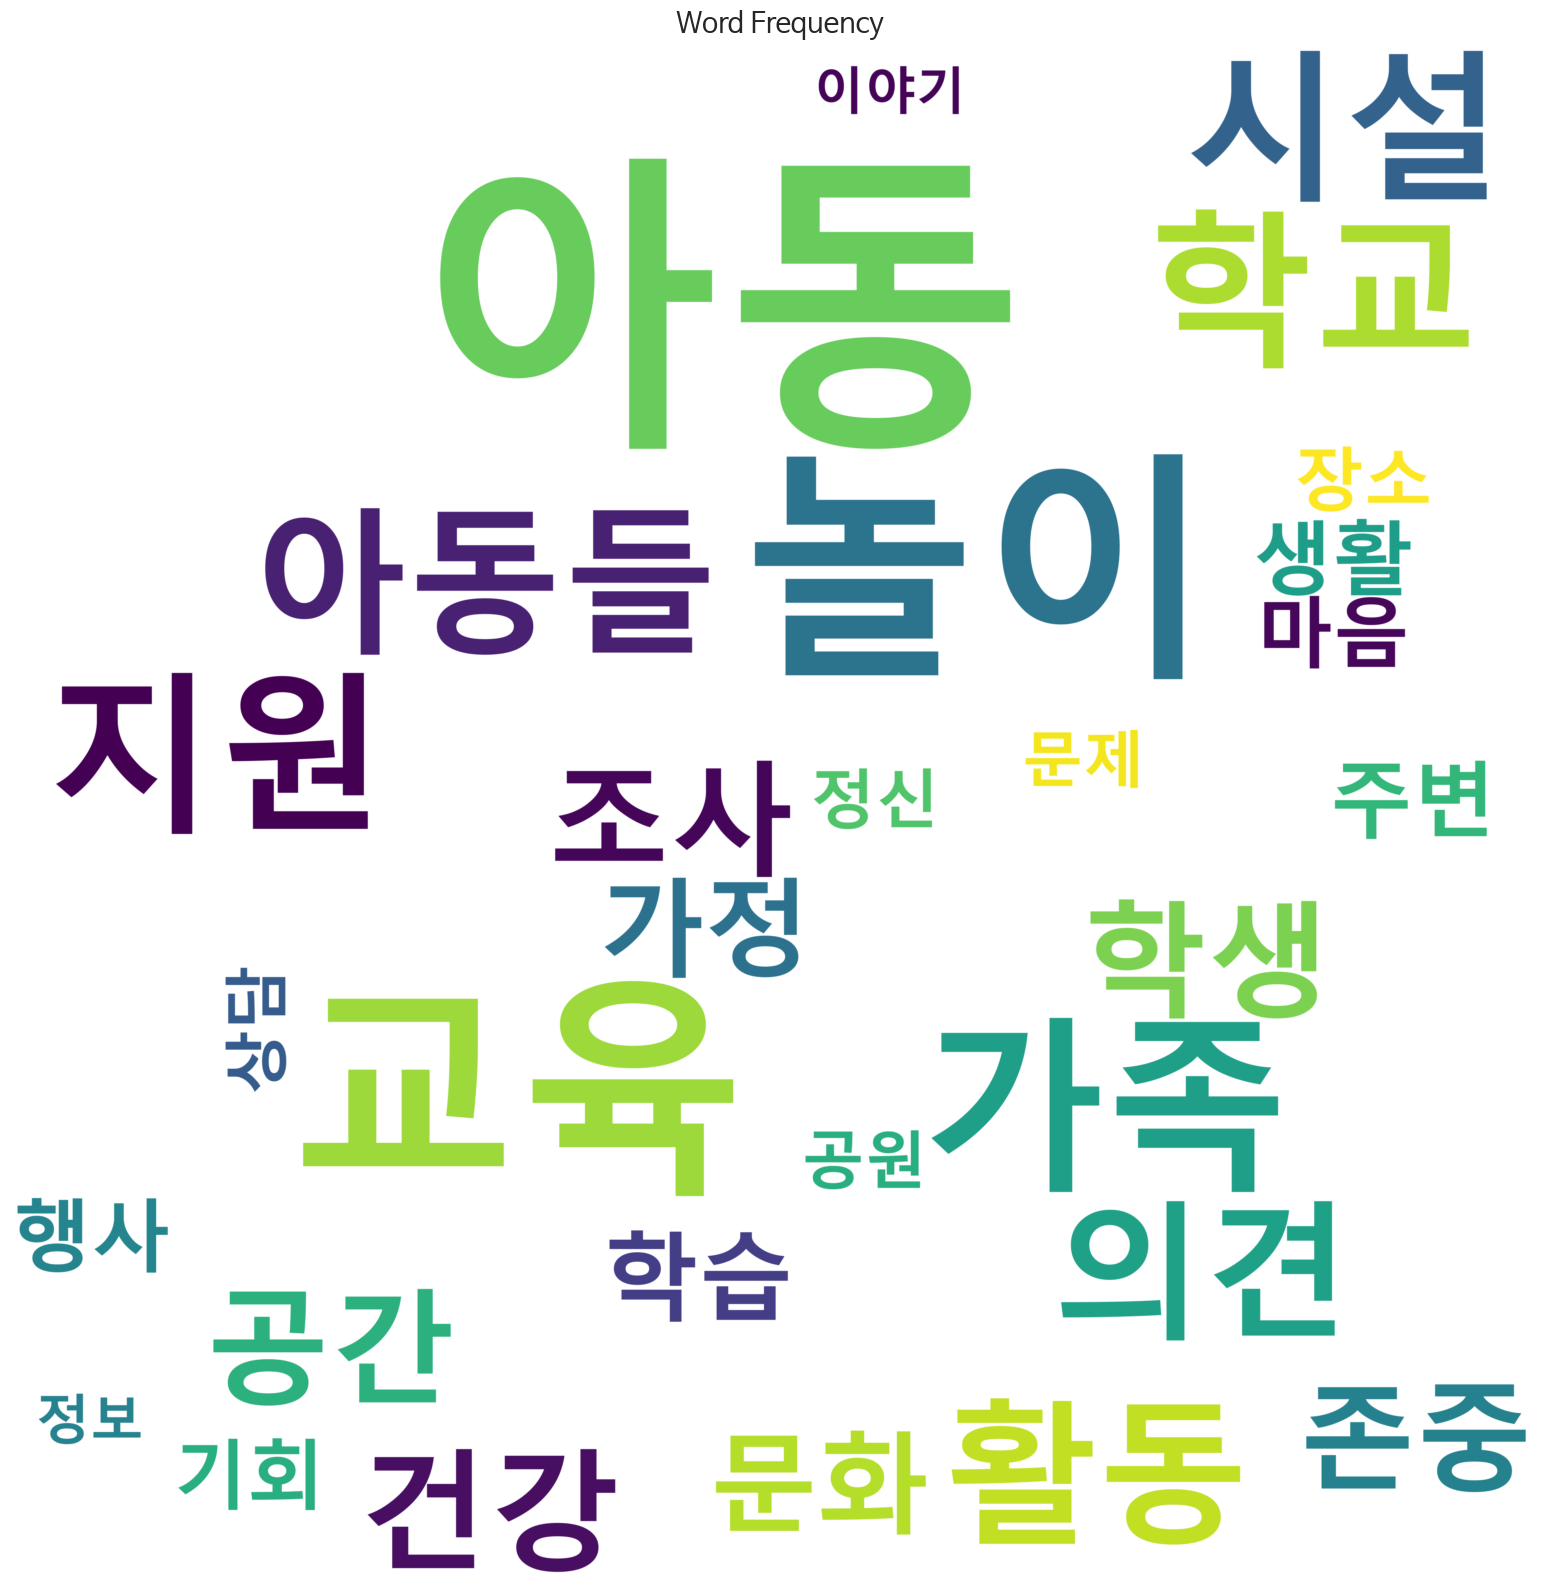

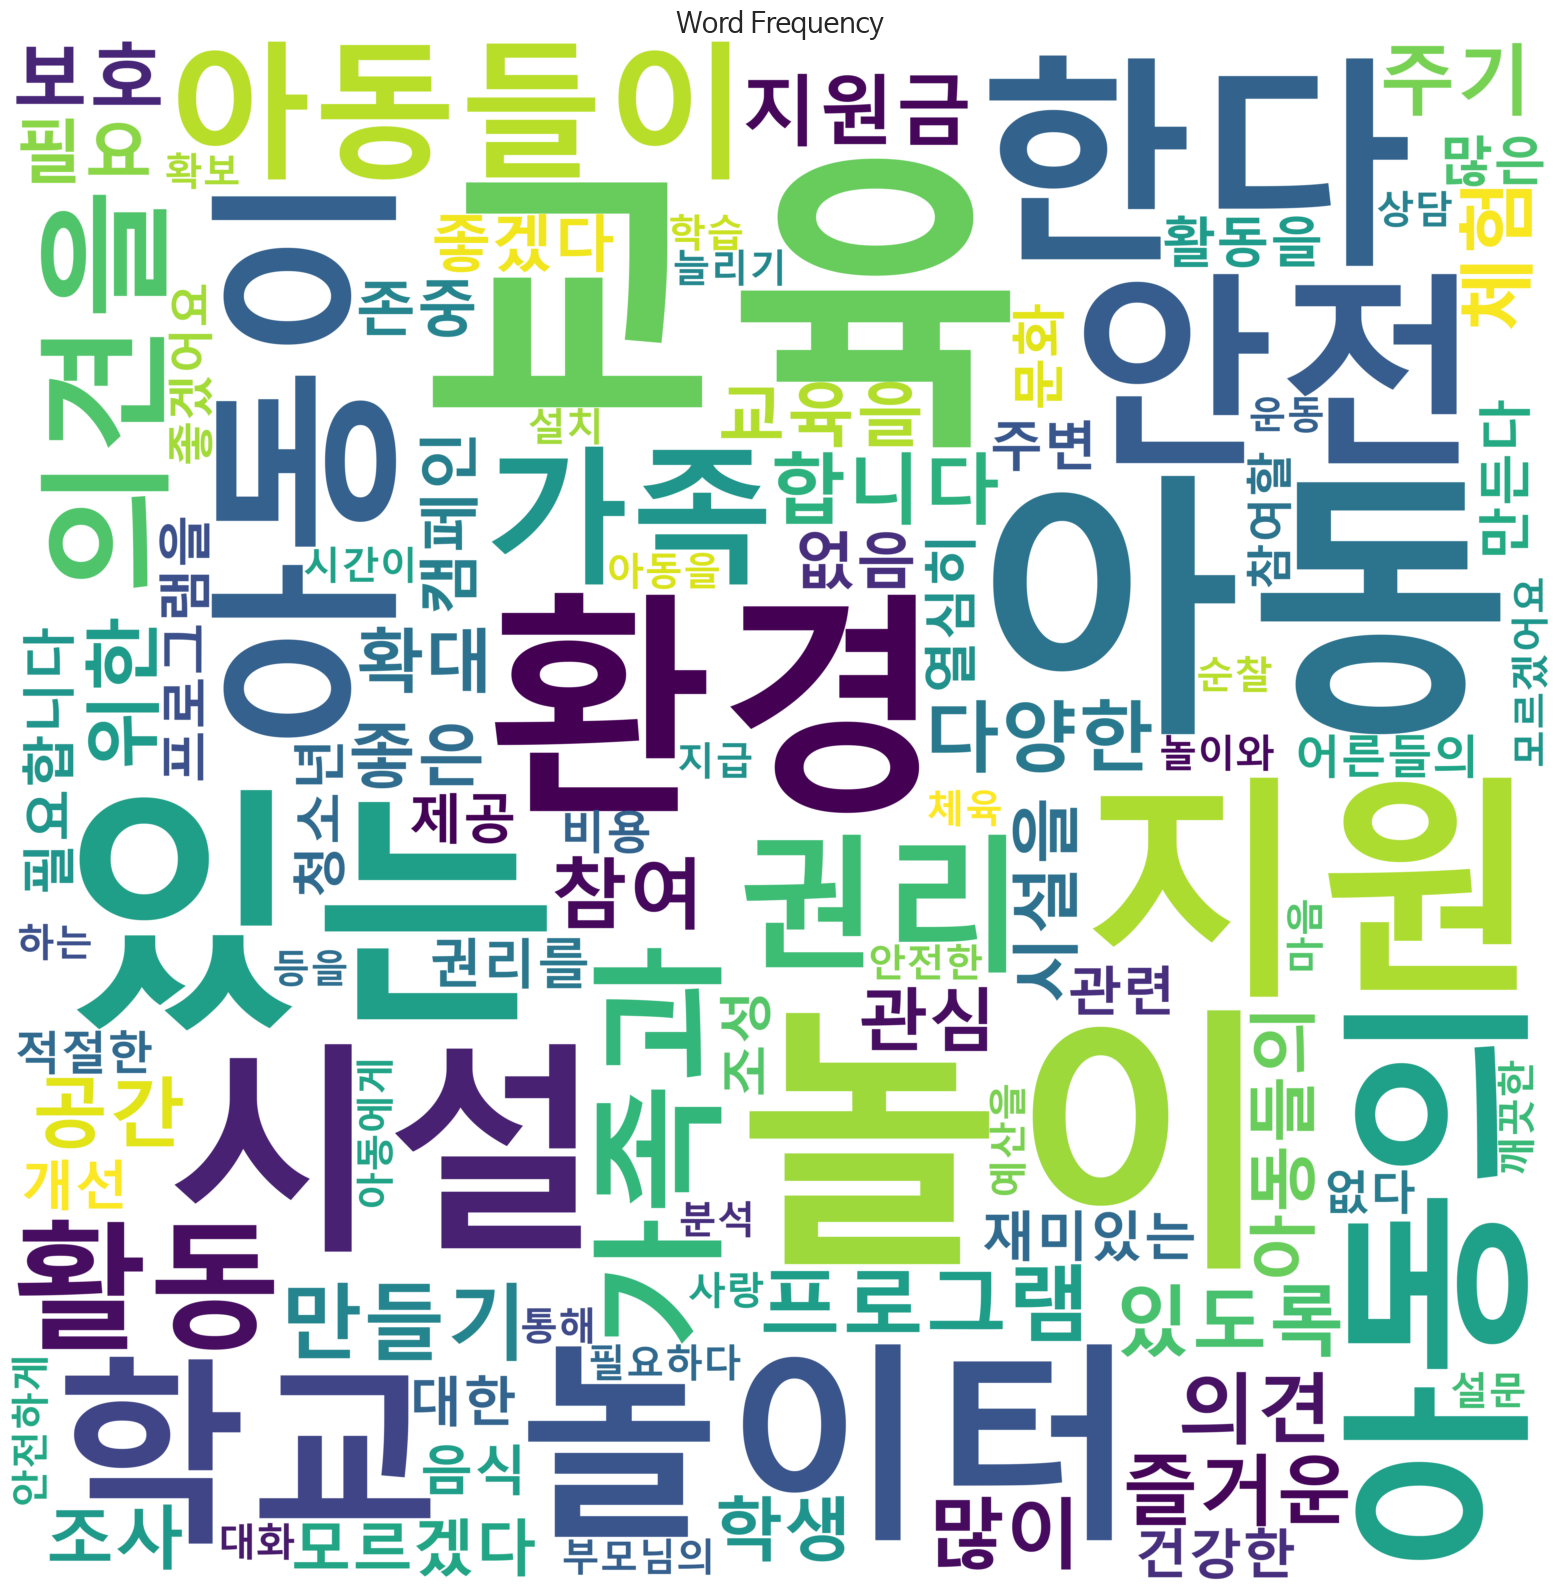

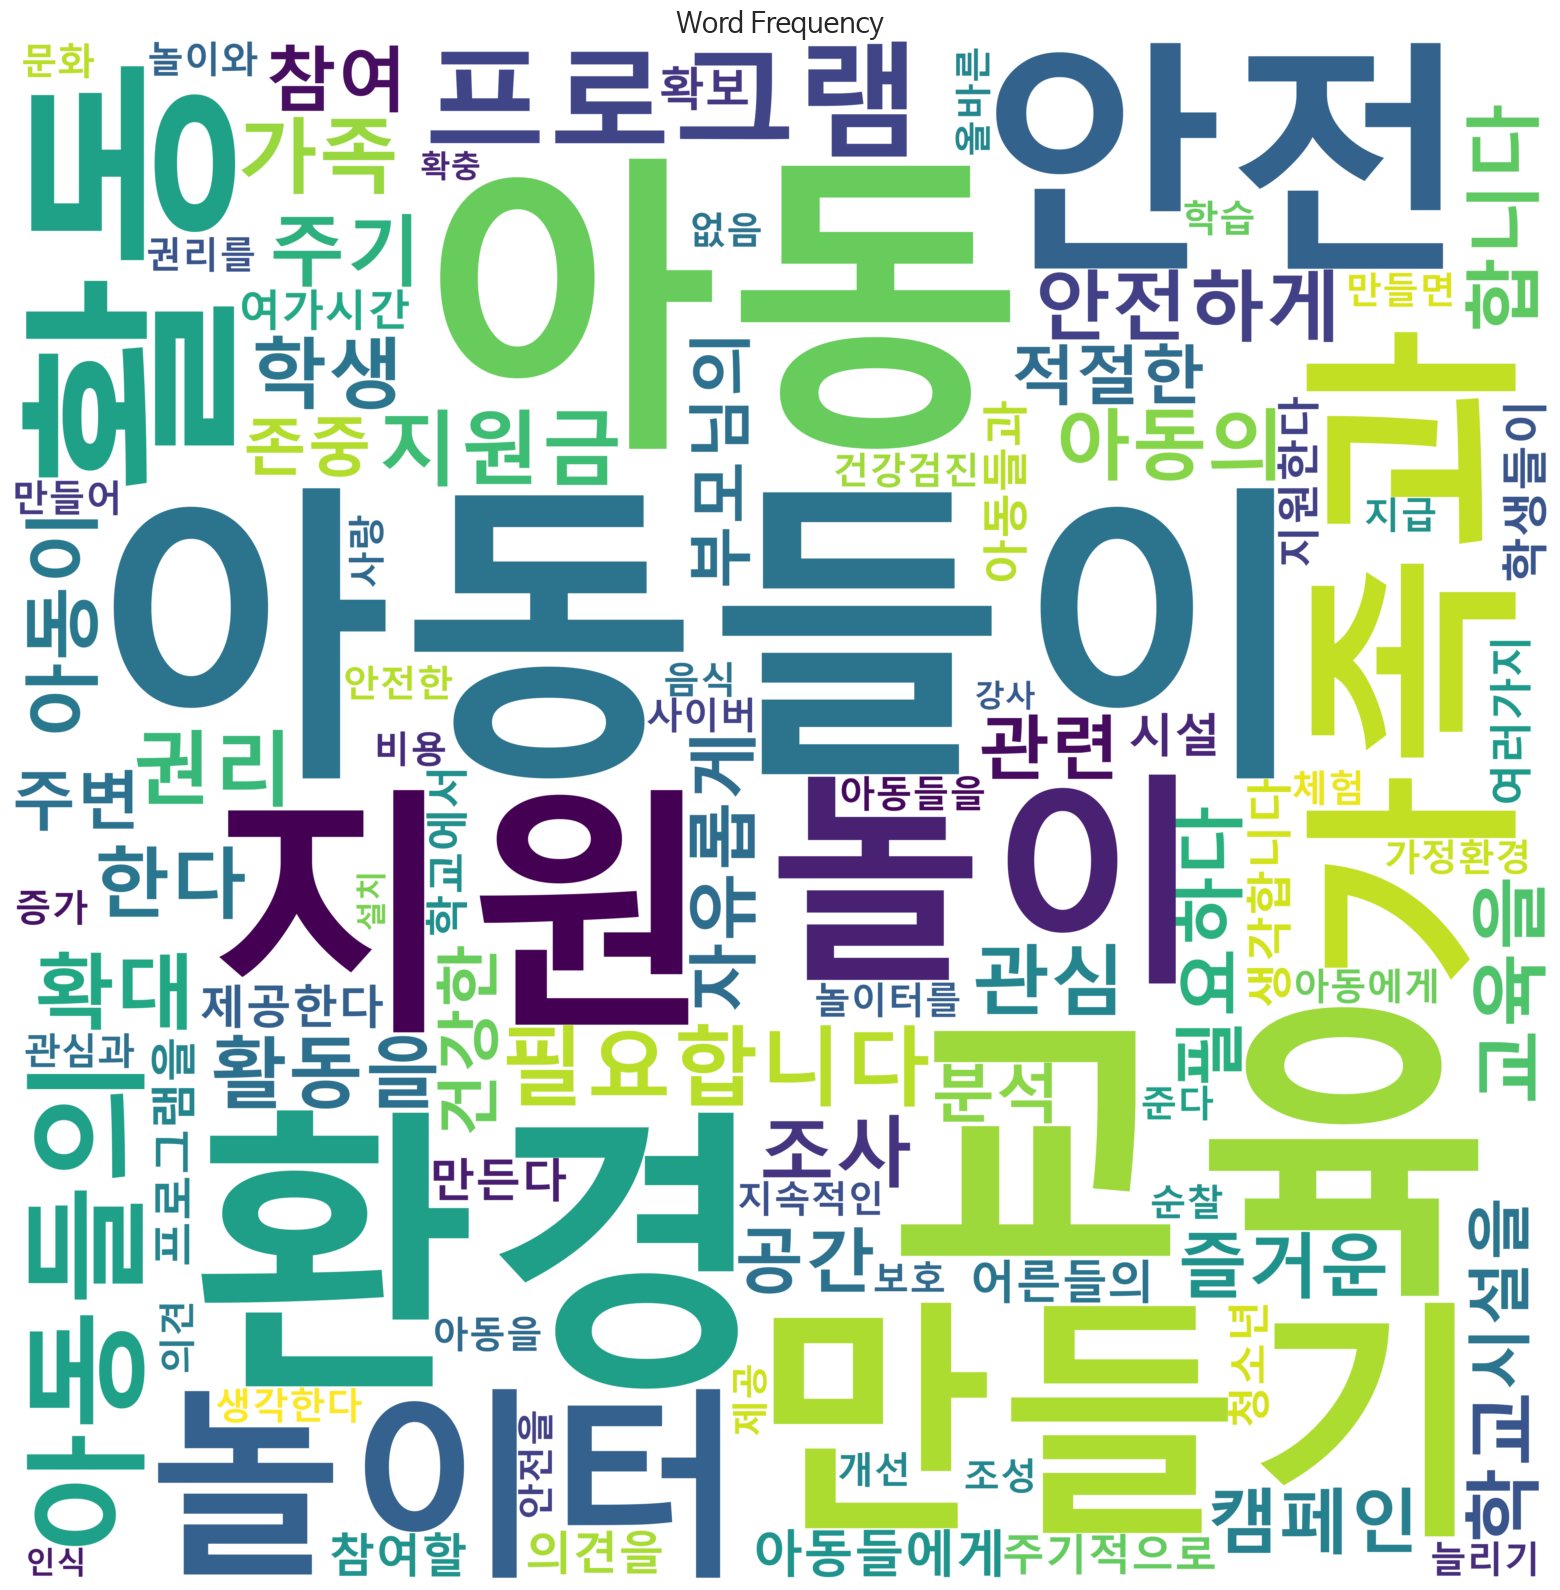

In [25]:
# 단어빈도 추출
wf_soy, waf_soy, \
wf_tf, waf_tf, \
wf_kb, waf_kb = preprocessing_wordfreq(df, colname_target='의견', colname_category=None,
                                       num_showkeyword=100, save_local=False, save_name='wordfreq_')
## 빈도 시각화
for wf in [wf_soy, wf_tf, wf_kb]:
    plot_wordcloud(wf, max_words=100, save_local=False)

> LDA 모델을 학습하기 전에 몇 개의 토픽으로 나눌 것인지 먼저 결정해야 한다. 일반적으로 perplexity와 coherence를 함께 고려해 토픽의 개수를 결정한다.
>
> - perplexity: 모델이 얼마나 잘 예측하는지 나타내는 지표로, 낮은 perplexity 값은 모델이 문서에서 나타나는 단어를 더 잘 예측한다는 것을 의미한다.
> - coherence: 발견된 토픽이 얼마나 의미있는지 나타내는 지표로, 높은 coherence 값은 토픽 내 단어들이 서로 관련성이 높다는 것을 의미한다.

2024-08-11 03:26:44,658	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Optimal Topic Number:  6


[Kss]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


,Related Keywords,Number of Sentences,Percentage
Topic 1,"'아동(23.5%)', '있는(14.7%)', '교육(9.8%)', '학교(9.8%)', '권리(7.8%)', '가족(6.9%)', '환경(6.9%)', '한다(6.9%)'...",94,0.2004
Topic 2,"'놀이(21.6%)', '있는(18.2%)', '시설(11.4%)', '의견을(9.1%)', '아동의(9.1%)', '아동들이(8.0%)', '아동이(5.7%)', '위한(...",60,0.1279
Topic 3,"'있는(20.5%)', '아동들이(16.9%)', '아동이(9.6%)', '위한(8.4%)', '환경(8.4%)', '한다(7.2%)', '있도록(7.2%)', '놀이(7....",73,0.1557
Topic 4,"'교육(28.4%)', '활동(8.8%)', '아동이(8.8%)', '가족(7.8%)', '프로그램(7.8%)', '한다(7.8%)', '가족과(7.8%)', '있는(7.8...",83,0.1770
Topic 5,"'지원(15.1%)', '아동(15.1%)', '한다(12.3%)', '환경(9.6%)', '있는(8.2%)', '체험(8.2%)', '학교(8.2%)', '교육(8.2%)...",77,0.1642
Topic 6,"'놀이(28.6%)', '안전(13.2%)', '합니다(9.9%)', '아동(8.8%)', '의견을(7.7%)', '있는(7.7%)', '아동의(7.7%)', '주기(5.5...",82,0.1748


,의견,Related Topic,Weight,Each Topic Weights
0,돈 지원금 지급,6,0.4824,"[(0, 0.04185477), (1, 0.35003775), (2, 0.0417701), (3, 0.041670702), (4, 0.04231225), (5, 0.4823..."
1,가족 동반 체험,5,0.7901,"[(0, 0.042288058), (1, 0.041698594), (2, 0.041756675), (3, 0.04240749), (4, 0.7901332), (5, 0.04..."
2,생활비 지원 생리대 화장지 필수 용품 지원,2,0.8955,"[(0, 0.020868378), (1, 0.89546853), (2, 0.02086884), (3, 0.020876529), (4, 0.021059468), (5, 0.0..."
3,화목한 설문 조사,3,0.6429,"[(0, 0.18996921), (1, 0.04190829), (2, 0.64285105), (3, 0.041671544), (4, 0.041730445), (5, 0.04..."
4,가족과 즐거운 대화를 한다 가족과 지내는 방법을 알러준다,4,0.9069,"[(0, 0.018602517), (1, 0.01855226), (2, 0.018686838), (3, 0.90690684), (4, 0.0187107), (5, 0.018..."
...,...,...,...,...
464,건강한 음식 위생관리,6,0.7911,"[(0, 0.04167147), (1, 0.041787755), (2, 0.04193278), (3, 0.041736625), (4, 0.041774947), (5, 0.7..."
465,건강한 음식을 지원하고 마음건강을 위한 설문 조사 건강한 음식 지원,3,0.9237,"[(0, 0.015206854), (1, 0.015264282), (2, 0.92372036), (3, 0.015173897), (4, 0.015292478), (5, 0...."
466,친구관계 전자기기 사용 줄이기 주기적으로 학생들의 미디어 건강 프로그램을 하기,4,0.9240,"[(0, 0.015193975), (1, 0.0151807), (2, 0.0152625125), (3, 0.92399836), (4, 0.015191797), (5, 0.0..."
467,학교 밖 아동 관리 건강한 음식 지원,5,0.8950,"[(0, 0.020982578), (1, 0.020940894), (2, 0.021013526), (3, 0.020893207), (4, 0.89495736), (5, 0...."


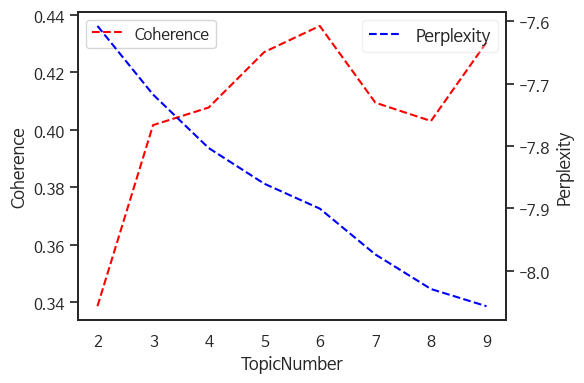

In [158]:
# 주체 추출
topic_kw, doc_topic, model = modeling_LDA(df['의견'], opt_numtopics=True, num_topicwords=10, num_topicsamples=10,
                                          save_local=True, save_name='Topics_byLDA.csv')
# # 주체 추출
# topic_kw, doc_topic, model = modeling_LDA(df['의견'], num_topics=3, num_topicwords=5, num_topicsamples=10,
#                                           save_local=True, save_name='Topics_byLDA.csv')
display(topic_kw, doc_topic)